In [2]:
import os
os.environ['USE_PYGEOS'] = '0'
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx 
from shapely.geometry import Point, LineString
from shapely import distance
import numpy as np
from pyproj import Transformer
from shapely.geometry import LineString
import shapely.ops as sp_ops
import warnings
warnings.filterwarnings("ignore")

In [3]:
path = os.getcwd()
parent = os.path.dirname(path)
df = gpd.read_file(parent+"\data\gis\osm\\roads.shp")  

In [4]:
road_names = df[df["ref"].notnull()]["ref"].unique()
road_names_N = [road for road in road_names if road.startswith("N")]
# road_names_N1 = [road for road in road_names_N if "1" in road]

df_N = df[df["ref"].isin(road_names_N)]
df_N["ref"]=df_N["ref"].str.replace(" ","")
# df_N["ref"]=df_N["ref"].str.replace("H","")


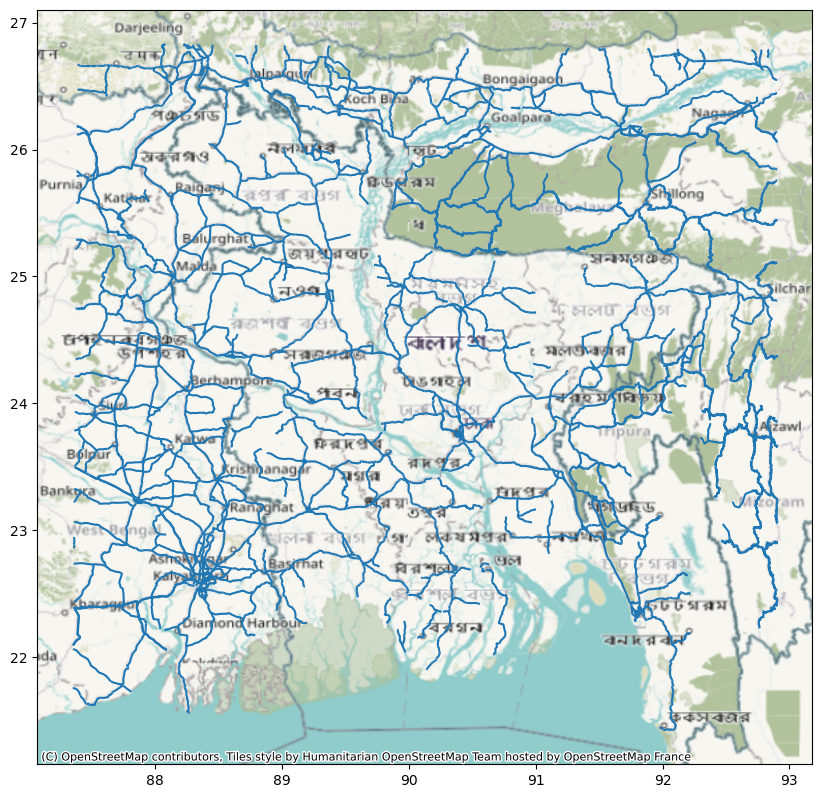

In [5]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
df_primary  =df[(df["type"]=="primary")|(df["type"]=="trunk")]
df_primary.plot(ax=ax)
cx.add_basemap(ax=ax,crs="epsg:4326")

In [6]:
main_folder_path =os.path.normpath(os.getcwd() + os.sep + os.pardir)
df_normal_data = pd.read_csv(main_folder_path + "\\data\\_roads3.csv")

gdf_normal = gpd.GeoDataFrame(df_normal_data, geometry=gpd.points_from_xy(df_normal_data.lon, df_normal_data.lat), crs="EPSG:4326")

from shapely import buffer
lines = []
for name in ["N1","N2"]:
    gdf_temp = gdf_normal[gdf_normal["road"]==name]
    line = buffer(LineString(gdf_temp["geometry"]),0.1)
    lines.append(line)

In [26]:
main_folder_path =os.path.normpath(os.getcwd() + os.sep + os.pardir)
df_sections = pd.read_csv(main_folder_path + "\\data\\intersections.csv")
df_sections = gpd.GeoDataFrame(df_sections, geometry=gpd.points_from_xy(df_sections.lon, df_sections.lat), crs="EPSG:4326")
df_sections_11=df_sections.head(11)

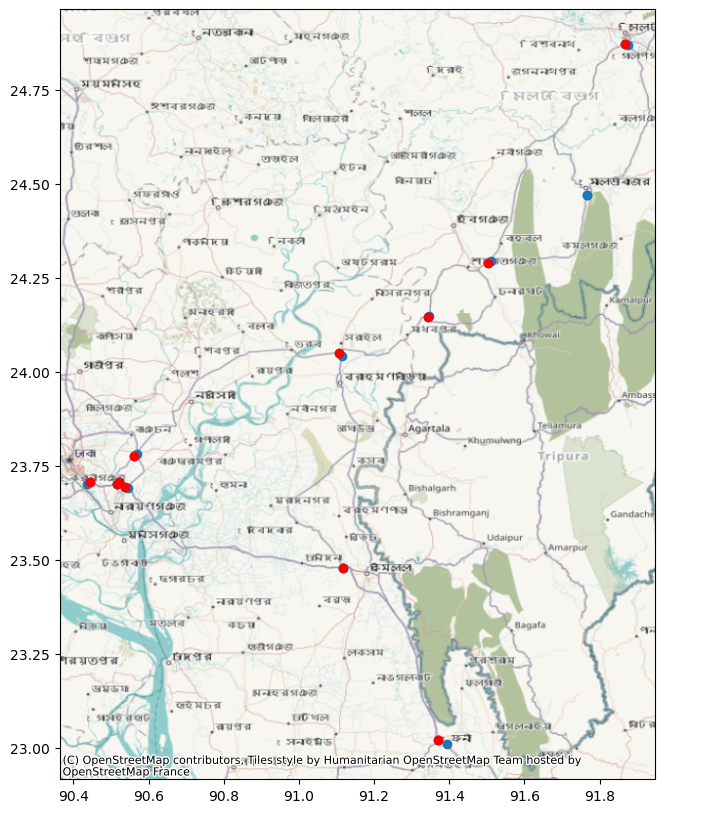

In [28]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
# gpd.GeoSeries(lines,crs="4326").plot(ax=ax)
df_sections.plot(ax=ax)
df_sections_11.plot(ax=ax,color="red")
cx.add_basemap(ax=ax,crs="EPSG:4326")

In [ ]:
df_secties

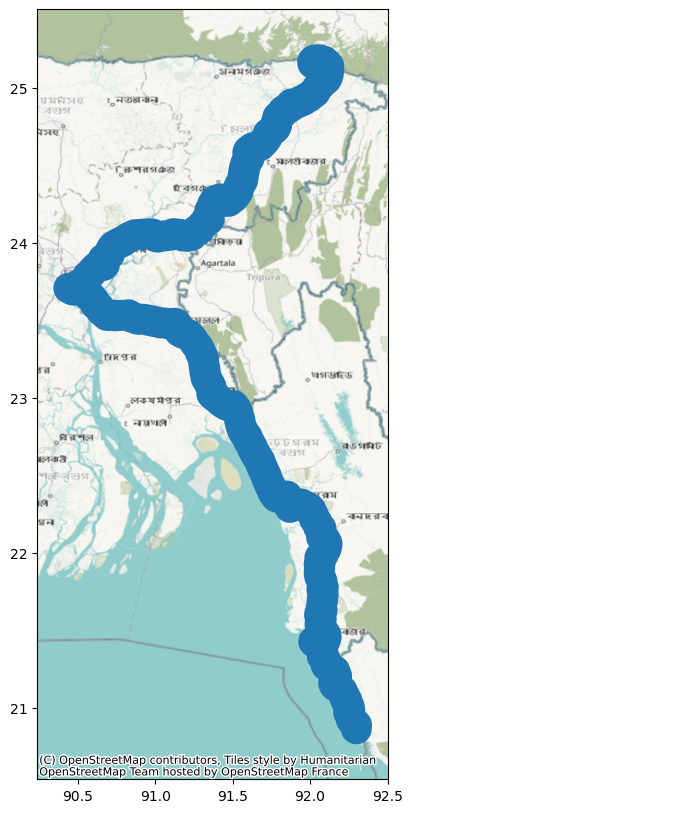

In [8]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
gpd.GeoSeries(lines,crs="4326").plot(ax=ax)
cx.add_basemap(ax=ax,crs="EPSG:4326")

In [9]:

df_primary

,osm_id,name,ref,type,oneway,bridge,maxspeed,geometry
20,10101955,Savar Kaliakoir Road,NaN,trunk,0,0,40.0,"LINESTRING (90.25843 23.91345, 90.25855 23.913..."
21,10101959,Ashulia Highway,N 302,primary,0,0,NaN,"LINESTRING (90.26974 23.93805, 90.27077 23.937..."
22,10101968,Dhaka - Mymensingh Road,NaN,primary,1,0,NaN,"LINESTRING (90.40117 23.88047, 90.40102 23.880..."
23,10101976,Dhaka - Mymensingh Road,NaN,primary,1,0,NaN,"LINESTRING (90.40064 23.87457, 90.40066 23.874..."
100,13641478,Bir Uttam Rafiqul Islam Ave,NaN,primary,1,0,60.0,"LINESTRING (90.42357 23.79780, 90.42359 23.797..."
...,...,...,...,...,...,...,...,...
112316,444696842,NaN,NaN,primary,1,0,40.0,"LINESTRING (90.41961 23.77094, 90.41980 23.770..."
112323,444888104,NaN,NaN,primary,1,0,NaN,"LINESTRING (90.37816 23.75124, 90.37826 23.751..."
112485,445306865,NaN,NaN,primary,0,0,NaN,"LINESTRING (90.17516 22.18230, 90.17512 22.182..."
112503,445433416,Eastern Metropolitan Bypass,NaN,primary,1,0,NaN,"LINESTRING (88.40189 22.51358, 88.40191 22.51353)"


In [10]:
cross_index_N1=[]
cross_index_N2=[]
for index in df_primary.index:
    if lines[0].intersects(df_primary.loc[index,"geometry"]):
        cross_index_N1.append(index)
    if lines[1].intersects(df_primary.loc[index,"geometry"]):
        cross_index_N2.append(index)


intersecting_N1 =df_primary[df_primary.index.isin(cross_index_N1)]
intersecting_N2 =df_primary[df_primary.index.isin(cross_index_N2)]
intersecting_N1N2=pd.concat([intersecting_N1,intersecting_N2])
# intersections_N1 =gseries["N1"].intersection(intersecting_N1).drop("N1")
# intersections_N2 =gseries["N2"].intersection(intersecting_N2).drop("N2")
# 
# gdf_N1 =gdf[gdf["road"]=="N1"]
# gdf_N2 =gdf[gdf["road"]=="N2"]

In [11]:
intersecting_N1N2= intersecting_N1N2[~intersecting_N1N2["ref"].str.replace(" ","").isin(["N1","N2"])]

In [12]:
intersecting_N1N2

,osm_id,name,ref,type,oneway,bridge,maxspeed,geometry
100,13641478,Bir Uttam Rafiqul Islam Ave,NaN,primary,1,0,60.0,"LINESTRING (90.42357 23.79780, 90.42359 23.797..."
101,13844837,D. I. T. Road,NaN,primary,1,0,60.0,"LINESTRING (90.42569 23.78060, 90.42567 23.780..."
102,13847051,Shaheed Tazuddin Road,NaN,primary,1,0,60.0,"LINESTRING (90.39832 23.77811, 90.39831 23.778..."
104,13847062,Bir Uttam Ziaur Rahman Road,NaN,primary,1,0,60.0,"LINESTRING (90.39832 23.77811, 90.39826 23.778..."
105,13848340,Tejgaon Gulshan Link Road,NaN,primary,1,0,40.0,"LINESTRING (90.40121 23.77126, 90.40332 23.771..."
...,...,...,...,...,...,...,...,...
100524,396269876,NaN,NaN,primary,1,0,NaN,"LINESTRING (90.43940 23.70796, 90.43993 23.707..."
101954,398386050,NaN,NaN,primary,0,0,NaN,"LINESTRING (91.84834 24.91031, 91.84846 24.910..."
102028,398431806,NaN,NaN,trunk,0,0,NaN,"LINESTRING (91.87798 24.89179, 91.87801 24.891..."
110914,438867086,Hakthola Road,NaN,primary,1,0,50.0,"LINESTRING (90.42329 23.71556, 90.42333 23.715..."


<AxesSubplot:>

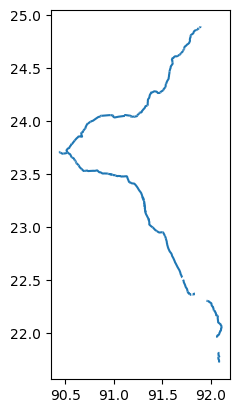

In [13]:
df_primary["ref"]=df_primary["ref"].str.replace(" ","")

df_N1N2=df_primary[(df_primary["ref"]=="N1")|(df_primary["ref"]=="N2")]
df_N1N2.plot()

In [14]:
Intersect_points = []
for line_N1N2 in df_N1N2["geometry"]:
    for intersect_line in intersecting_N1N2["geometry"]:
        if line_N1N2!=intersect_line:
            if line_N1N2.intersects(intersect_line):
               Intersect_points.append(line_N1N2.intersection(intersect_line))
            
    

In [15]:

df_used_intersects = pd.read_csv(r"C:\Users\roelo\Downloads\intersecs.csv")
gdf_used_intersects = gpd.GeoDataFrame(df_normal_data, geometry=gpd.points_from_xy(df_normal_data.lon, df_normal_data.lat), crs="EPSG:4326")

<AxesSubplot:>

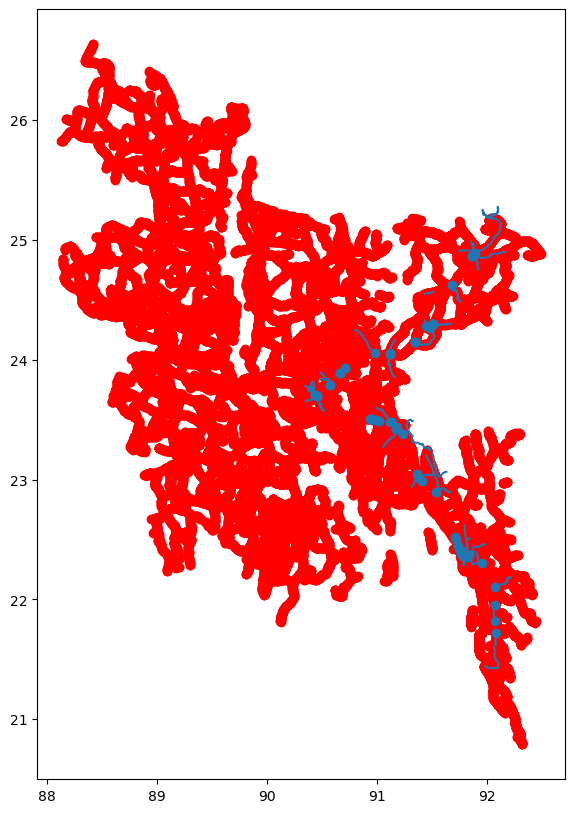

In [16]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
intersecting_N1N2.plot(ax=ax)
gdf_used_intersects.plot(ax=ax,color="red")
gpd.GeoSeries(Intersect_points,crs="4326").plot(ax=ax)


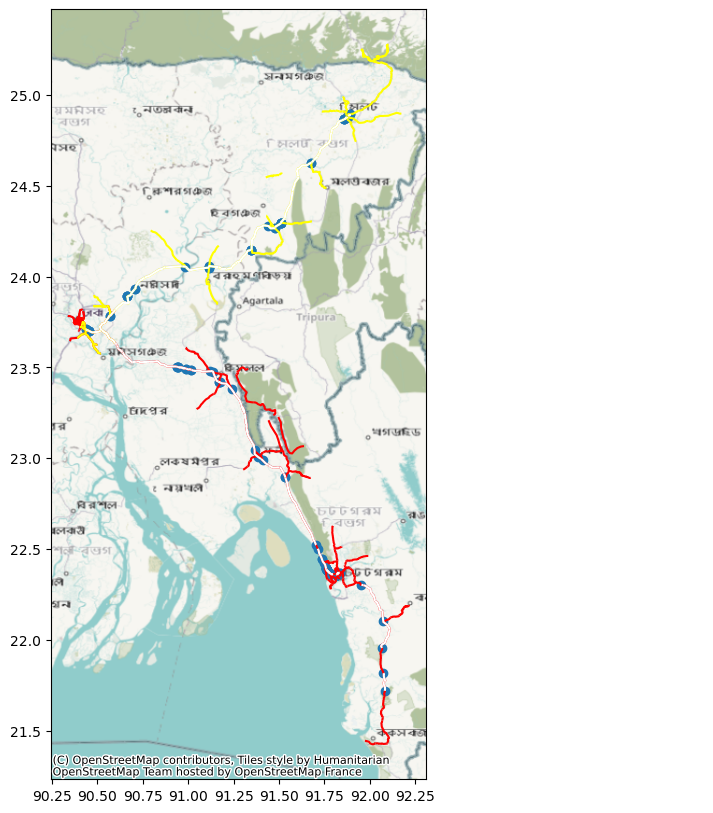

In [17]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
# gpd.GeoSeries(lines,crs="4326").plot(ax=ax,alpha=0.3)
intersecting_N1.plot(ax=ax,color="red")
intersecting_N2.plot(ax=ax,color="yellow")
df_N1N2.plot(ax=ax,color="white")
gpd.GeoSeries(Intersect_points,crs="4326").plot(ax=ax)
cx.add_basemap(ax=ax,crs="EPSG:4326")

In [18]:
df_trunk = df_N[((df_N["ref"]=="N1")|(df_N["ref"]=="N2"))]#(df_N["type"]=="trunk")&

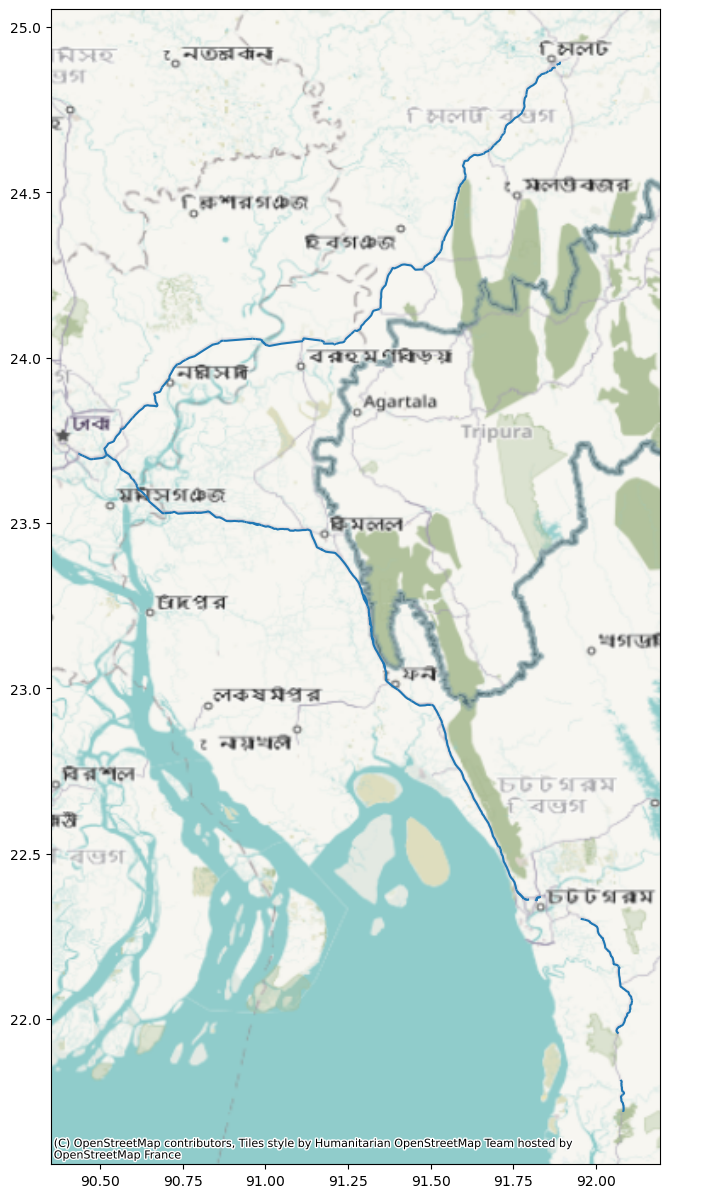

In [19]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
df_trunk.plot(ax=ax)
cx.add_basemap(crs=4326,ax=ax)
plt.show()

In [20]:
for 

SyntaxError: invalid syntax (3550306636.py, line 1)